### ⭕ **Ejercicio importante por tu cuenta**

Prueba el modelo del ejercicio dos con varias modificaciones y revisamos en cada caso:
1. El rendimiento (R2/MAE/MSE), ¿disminuye o aumenta?
2. ¿Qué variables son las que son más importantes?

* Cargamos la info:

In [2]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


url = 'https://github.com/DCDPUAEM/DCDP/raw/main/03%20Machine%20Learning/data/cars-prices.csv'

* Procesamos el dataset:

In [26]:
##PROCESAMIENTO
#quitamos algunas variables no relevantes
df = pd.read_csv(url)
df.drop(columns=['car_ID','CarName'],inplace=True)

# Reemplazar los datos de las columnas `cylindernumber` y `doornumber` con número. Las convertimos a variables numéricas
cols = ['cylindernumber','doornumber']
replacing_dict = {'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8}
for col in cols:
    df[col].replace(replacing_dict,inplace=True)

#SEPARAMOS VARIABLES DE SALIDA
y = df['price'].values
df.drop(columns='price',inplace=True)

#CODIGICACION ONE HOT PARA VARIABLES CATEGÓRICAS
X_df = pd.get_dummies(df)

#DEFINIMOS MATRIZ DE FEATURES
X = X_df.values

#Dividimos los datos en entrenamiento (train) y prueba (test) con una proporción 80%/20%.
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=4595)
print(f"Entrenamiento: {X_train.shape,y_train.shape}")
print(f"Prueba: {X_test.shape,y_test.shape}")

Entrenamiento: ((164, 45), (164,))
Prueba: ((41, 45), (41,))


#### 1. *¿Qué pasa si no usas normalización?*

* Probamos el modelo con y sin normalización:

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=4595)

selector = VarianceThreshold()
X_train = selector.fit_transform(X_train)   # Entrenamos y transformamos el de entrenamiento
X_test = selector.transform(X_test)        # Sólo transformamos el de prueba

### NO REALIZAMOS LA NORMALIZACION PARA ESTOS DATOS
lr_1 = LinearRegression()
lr_1.fit(X_train, y_train)
y_pred_test_1 = lr_1.predict(X_test)
y_pred_train_1 = lr_1.predict(X_train)

#CREAMOS COPIA PARA HACERLO CON DATOS NORMALIZADOS
X_train_2=X_train.copy()
X_test_2=X_test.copy()

scaler = StandardScaler()
# scaler = MinMaxScaler()
X_train_2 = scaler.fit_transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)
lr_2 = LinearRegression()
lr_2.fit(X_train_2, y_train)

y_pred_test_2 = lr_2.predict(X_test_2)
y_pred_train_2 = lr_2.predict(X_train_2)

#COMPARAMOS
print(f'R2 entrenamiento [NO NORMALIZADO: {lr_1.score(X_train,y_train).round(2)}, NORMALIZADOS: {lr_2.score(X_train_2,y_train).round(2)}]')
print(f'R2 prueba [NO NORMALIZADO: {lr_1.score(X_test,y_test).round(2)}, NORMALIZADOS: {lr_2.score(X_test_2,y_test).round(2)}]\n')

print(f"MAE entrenamiento [NO NORMALIZADO: {mean_absolute_error(y_train,y_pred_train_1).round(2)}, NORMALIZADOS:  {mean_absolute_error(y_train,y_pred_train_2).round(2)}]")  # Esta es muy interpretativa
print(f"MAE prueba [NO NORMALIZADO: {mean_absolute_error(y_test,y_pred_test_1).round(2)}, NORMALIZADOS: {mean_absolute_error(y_test,y_pred_test_2).round(2)}]\n")  # Esta es muy interpretativa

print(f"MSE entrenamiento [NO NORMALIZADO: {mean_squared_error(y_train,y_pred_train_1).round(2)}, NORMALIZADOS: {mean_squared_error(y_train,y_pred_train_2).round(2)}]")
print(f"MSE prueba [NO NORMALIZADO: {mean_squared_error(y_test,y_pred_test_1).round(2)}, NORMALIZADOS: {mean_squared_error(y_test,y_pred_test_2).round(2)}]\n")


columns = X_df.columns.to_list()
coefs_dict = dict(zip(columns,lr_1.coef_))
print(f'Principales variables para determinar el precio con valores no normalizados: \n{dict(sorted(coefs_dict.items(),key=lambda x:x[1],reverse=True)[0:5])}\n')

columns = X_df.columns.to_list()
coefs_dict = dict(zip(columns,lr_2.coef_))
print(f'Principales variables para determinar el precio con valores normalizados: \n{dict(sorted(coefs_dict.items(),key=lambda x:x[1],reverse=True)[0:5])}')

R2 entrenamiento [NO NORMALIZADO: 0.93, NORMALIZADOS: 0.93]
R2 prueba [NO NORMALIZADO: 0.89, NORMALIZADOS: 0.89]

MAE entrenamiento [NO NORMALIZADO: 1478.95, NORMALIZADOS:  1478.95]
MAE prueba [NO NORMALIZADO: 2234.67, NORMALIZADOS: 2234.67]

MSE entrenamiento [NO NORMALIZADO: 3692070.72, NORMALIZADOS: 3692070.72]
MSE prueba [NO NORMALIZADO: 11944281.56, NORMALIZADOS: 11944281.56]

Principales variables para determinar el precio con valores no normalizados: 
{'enginetype_rotor': 7769.116621714023, 'enginelocation_rear': 5703.189008174585, 'fuelsystem_idi': 5295.5601553045335, 'fueltype_diesel': 5295.560155304531, 'carbody_convertible': 2901.1564386774576}

Principales variables para determinar el precio con valores normalizados: 
{'enginesize': 32482.93170169278, 'curbweight': 11712.045795038339, 'enginetype_rotor': 7769.116621714724, 'carwidth': 6676.770950541305, 'enginelocation_rear': 5703.189008173684}


**Comentarios:**  
Con estos resultados podemos observar que entre los valores normalizados y los no normalizados no hay una diferencia en los índices de rendimiento, pero si se ven afectadas las principales variables para determinar el valor del precio.  
Con los datos no normalizados tenemos que **enginetype_rotor** y **enginelocation_rear** son las variables con mayor peso. Mientras que con los datos normalizados tenemos que son **enginesize** y **curbweight**

####  2. *¿Qué pasa si no haces selección de features? ¿qué pasa si sólo te quedas con algunas features seleccionadas *intuitivamente*?*
  
* Probamos el modelo sin seleccion de features, y con seleccion intuitiva:

In [30]:
##PROCESAMIENTO
#quitamos algunas variables no relevantes
df = pd.read_csv(url)
df.drop(columns=['car_ID','CarName'],inplace=True)

# Reemplazar los datos de las columnas `cylindernumber` y `doornumber` con número. Las convertimos a variables numéricas
cols = ['cylindernumber','doornumber']
replacing_dict = {'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8}
for col in cols:
    df[col].replace(replacing_dict,inplace=True)

#SEPARAMOS VARIABLES DE SALIDA
y = df['price'].values
df.drop(columns='price',inplace=True)

#CODIGICACION ONE HOT PARA VARIABLES CATEGÓRICAS
X_df = pd.get_dummies(df)

#DEFINIMOS MATRIZ DE FEATURES
X = X_df.values
#Dividimos los datos en entrenamiento (train) y prueba (test) con una proporción 80%/20%.
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=4595)

#OMITIMOS EL PASO DE SELECCION DE FEATURES
scaler = StandardScaler()
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

#Revisamos metricas de rendimiento
print(f"R2 en el entrenamiento: {lr.score(X_train,y_train).round(2)}")
print(f"R2 en la prueba: {lr.score(X_test,y_test).round(2)}")

print(f"MAE en el conjunto de entrenamiento: {mean_absolute_error(y_train,y_pred_train).round(2)}")  # Esta es muy interpretativa
print(f"MAE en el conjunto de prueba: {mean_absolute_error(y_test,y_pred_test).round(2)}")  # Esta es muy interpretativa

print(f"MSE en el conjunto de entrenamiento: {mean_squared_error(y_train,y_pred_train).round(2)}")
print(f"MSE en el conjunto de prueba: {mean_squared_error(y_test,y_pred_test).round(2)}")


columns = X_df.columns.to_list()
coefs_dict = dict(zip(columns,lr.coef_))
print(f'Principales variables para determinar el precio con valores normalizados: \n{dict(sorted(coefs_dict.items(),key=lambda x:x[1],reverse=True)[0:5])}')


R2 en el entrenamiento: 0.93
R2 en la prueba: 0.89
MAE en el conjunto de entrenamiento: 1478.95
MAE en el conjunto de prueba: 2234.67
MSE en el conjunto de entrenamiento: 3692070.72
MSE en el conjunto de prueba: 11944281.56
Principales variables para determinar el precio con valores normalizados: 
{'enginesize': 32482.93170169278, 'curbweight': 11712.045795038339, 'enginetype_rotor': 7769.116621714724, 'carwidth': 6676.770950541305, 'enginelocation_rear': 5703.189008173684}


In [31]:
##PROCESAMIENTO
df = pd.read_csv(url)
#Nos quedamos con las variables seleccionadas manualmente
df.drop(columns=['car_ID','CarName'],inplace=True)

seleccion=['carbody', 'cylindernumber', 'horsepower','enginetype', 'price']
df2=df[seleccion].copy()
print(df2.columns)

#SEPARAMOS VARIABLES DE SALIDA
y = df2['price'].values
df2.drop(columns='price',inplace=True)

#CODIGICACION ONE HOT PARA VARIABLES CATEGÓRICAS
X_df = pd.get_dummies(df2)
print(X_df.columns)

#DEFINIMOS MATRIZ DE FEATURES
X = X_df.values

#Dividimos los datos en entrenamiento (train) y prueba (test) con una proporción 80%/20%.
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=4595)

scaler = StandardScaler()
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

#Revisamos metricas de rendimiento
print(f"R2 en el entrenamiento: {lr.score(X_train,y_train).round(2)}")
print(f"R2 en la prueba: {lr.score(X_test,y_test).round(2)}")

print(f"MAE en el conjunto de entrenamiento: {mean_absolute_error(y_train,y_pred_train).round(2)}")  # Esta es muy interpretativa
print(f"MAE en el conjunto de prueba: {mean_absolute_error(y_test,y_pred_test).round(2)}")  # Esta es muy interpretativa

print(f"MSE en el conjunto de entrenamiento: {mean_squared_error(y_train,y_pred_train).round(2)}")
print(f"MSE en el conjunto de prueba: {mean_squared_error(y_test,y_pred_test).round(2)}")


columns = X_df.columns.to_list()
coefs_dict = dict(zip(columns,lr.coef_))
print(f'Principales variables para determinar el precio con valores normalizados: \n{dict(sorted(coefs_dict.items(),key=lambda x:x[1],reverse=True)[0:5])}')


Index(['carbody', 'cylindernumber', 'horsepower', 'enginetype', 'price'], dtype='object')
Index(['horsepower', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'enginetype_dohc', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor'],
      dtype='object')
R2 en el entrenamiento: 0.86
R2 en la prueba: 0.84
MAE en el conjunto de entrenamiento: 1896.49
MAE en el conjunto de prueba: 2928.65
MSE en el conjunto de entrenamiento: 7272782.53
MSE en el conjunto de prueba: 16777905.03
Principales variables para determinar el precio con valores normalizados: 
{'horsepower': 27017.303957419437, 'cylindernumber_eight': 15100.81443747938, 'enginetype_l': 9093.530530944647, 'cylindernumber_twelv

**Comentarios:**  
Si no hago seleccion de features todas las variables son consideradas, y al menos en este caso, observamos un buen rendimiento con las metricas de desempeño, pero corremos el riesgo de ajustar el modelo con alguna característica irrelevante. Por otro lado, cuando hago seleccion de features manualmente las medidas de rendimiento bajan su nivel de precision (R2 disminuye y para MAE y MSE aumenta). Ademas, estaría creando un problema de sesgo a limitar el modelo a las características que yo selecciono.

#### 3. *¿Qué pasa si no cuidas el data leakage? Es decir, haz primero todo el preprocesamiento y después divides en train/test.*  
* Hacemos la prueba

In [34]:
##PROCESAMIENTO
#quitamos algunas variables no relevantes
df = pd.read_csv(url)
df.drop(columns=['car_ID','CarName'],inplace=True)

# Reemplazar los datos de las columnas `cylindernumber` y `doornumber` con número. Las convertimos a variables numéricas
cols = ['cylindernumber','doornumber']
replacing_dict = {'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8}
for col in cols:
    df[col].replace(replacing_dict,inplace=True)

#SEPARAMOS VARIABLES DE SALIDA
y = df['price'].values
df.drop(columns='price',inplace=True)

#CODIGICACION ONE HOT PARA VARIABLES CATEGÓRICAS
X_df = pd.get_dummies(df)

#DEFINIMOS MATRIZ DE FEATURES
X = X_df.values

#PROCESAMOS ANTES
scaler = StandardScaler()
X_processed = scaler.fit_transform(X)

#Dividimos los datos en entrenamiento (train) y prueba (test) con una proporción 80%/20%.
X_train, X_test, y_train, y_test = train_test_split(X_processed,y, train_size=0.8, random_state=4595)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

#Revisamos metricas de rendimiento
print(f"R2 en el entrenamiento: {lr.score(X_train,y_train).round(2)}")
print(f"R2 en la prueba: {lr.score(X_test,y_test).round(2)}")

print(f"MAE en el conjunto de entrenamiento: {mean_absolute_error(y_train,y_pred_train).round(2)}")  # Esta es muy interpretativa
print(f"MAE en el conjunto de prueba: {mean_absolute_error(y_test,y_pred_test).round(2)}")  # Esta es muy interpretativa

print(f"MSE en el conjunto de entrenamiento: {mean_squared_error(y_train,y_pred_train).round(2)}")
print(f"MSE en el conjunto de prueba: {mean_squared_error(y_test,y_pred_test).round(2)}")


columns = X_df.columns.to_list()
coefs_dict = dict(zip(columns,lr.coef_))
print(f'Principales variables para determinar el precio con valores normalizados: \n{dict(sorted(coefs_dict.items(),key=lambda x:x[1],reverse=True)[0:5])}')

R2 en el entrenamiento: 0.93
R2 en la prueba: 0.89
MAE en el conjunto de entrenamiento: 1478.95
MAE en el conjunto de prueba: 2234.67
MSE en el conjunto de entrenamiento: 3692070.72
MSE en el conjunto de prueba: 11944281.56
Principales variables para determinar el precio con valores normalizados: 
{'enginesize': 5091.975554446952, 'curbweight': 2359.712363170307, 'fueltype_diesel': 1496.0966289429516, 'fuelsystem_idi': 1496.0966289429493, 'carwidth': 1190.6714857104275}


**Comentarios:**  
Observo un mejor resultado en las métricas de rendimiento. Esto se debe a que estamos probando el modelo con los mismos datos con los que lo construimos.

#⭕ Ejercicio

Usaremos un dataset sobre publicidad. Este dataset consta de 200 registros, cada registro consta de las variables.

* TV: dólares de publicidad gastados en TV para un solo producto en un mercado determinado (en miles de dólares)
* Radio: inversión publicitaria en radio
* Newspaper: inversión publicitaria en periódicos
* Sales: ventas de un solo producto en un mercado determinado (en miles de unidades).


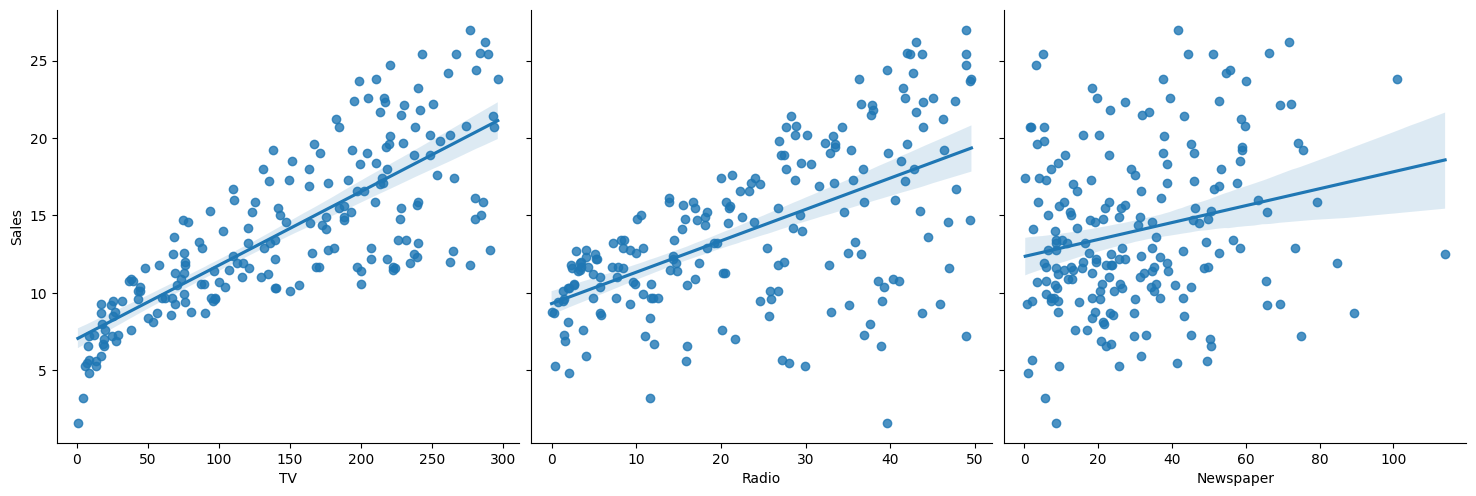

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://github.com/DCDPUAEM/DCDP/raw/main/03%20Machine%20Learning/data/advertising.csv'
df = pd.read_csv(url,index_col=0)
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=5, aspect=1, kind='reg')
plt.show()

Objetivos:

1. Entrenar un modelo de regresión lineal usando el 85% de las instancias, separar el resto para prueba. **No olvides el preprocesamiento**, **cuidado con el data leakage**.
2. Reportar las métricas de rendimiento MAE, MSE en las predicciones con el conjunto de prueba solamente.
3. Con base en la métrica de rendimiento MAE, escoge el mejor modelo de regresión lineal. Es decir, ¿cuál es el menor MAE que puedes obtener en el conjunto de prueba? Junto con este número, reporta los parámetros y la combinación de técnicas que usaste.

Considera las siguientes situaciones en el preprocesamiento:

* ¿Hay valores faltantes? En caso de que sí, recuerda que tienes dos opciones: remover estas instancias o hacer imputación.
* ¿Cuál es el rango de las 3 variables? ¿tienen magnitudes muy diferentes?
* ¿Hay alguna variable que consideres que no es muy relevante?
* Realiza la(s) técnica(s) de normalización que consideres necesario: selección de features, normalización.




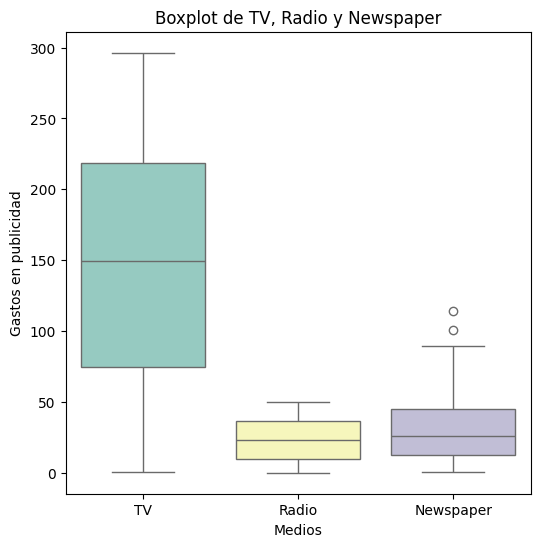

In [8]:
df = pd.read_csv(url,index_col=0)
#Eliminamos valores faltantes
df=df.dropna() # NO SE OBSERVAN VALORES FALTANTE

y = df['Sales'].values
df.drop(columns='Sales',inplace=True)

#DEFINIMOS MATRIZ DE FEATURES
X = df.values

plt.figure(figsize=(6, 6))  # Tamaño de la figura
sns.boxplot(data=df, palette="Set3")  # Utiliza Seaborn para crear el boxplot
plt.title('Boxplot de TV, Radio y Newspaper')
plt.xlabel('Medios')
plt.ylabel('Gastos en publicidad')
plt.show()


Debido al rando de magnitudes en las 3 variables se opta por realizar una normalizacion.

In [9]:

#Dividimos los datos en entrenamiento (train) y prueba (test) con una proporción 85%/15%.
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.85, random_state=4595)

## normalizacion
#scaler = StandardScaler()
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# # seleccion de features
# selector = VarianceThreshold(0)
# X_train = selector.fit_transform(X_train)
# X_test = selector.fit_transform(X_test)

### NO REALIZAMOS LA NORMALIZACION PARA ESTOS DATOS
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

#Revisamos metricas de rendimiento
print(f"R2 en la prueba: {lr.score(X_test,y_test).round(2)}")
print(f"MAE en el conjunto de prueba: {mean_absolute_error(y_test,y_pred_test).round(2)}")  # Esta es muy interpretativa
print(f"MSE en el conjunto de prueba: {mean_squared_error(y_test,y_pred_test).round(2)}")

R2 en la prueba: 0.84
MAE en el conjunto de prueba: 1.15
MSE en el conjunto de prueba: 4.59


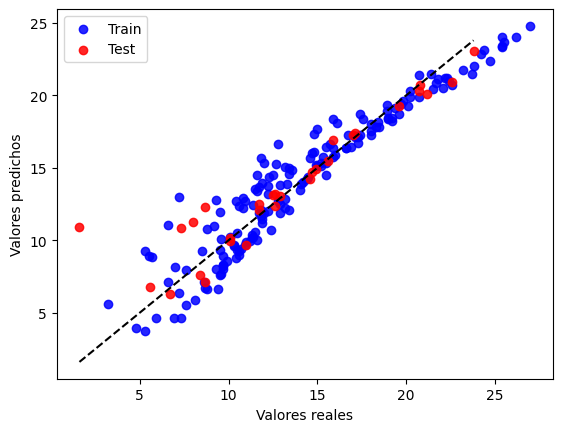

In [6]:
xaxis = np.linspace(np.min(y_test),np.max(y_test),100)

plt.figure(dpi=100)
plt.scatter(y_train, y_pred_train, c='blue',alpha=0.85,label='Train')
plt.scatter(y_test, y_pred_test, c='red',alpha=0.85,label='Test')
plt.plot(xaxis,xaxis,'k--')  # La línea de referencia y_pred=y_real
plt.legend(loc='best')
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.show()

**Comentarios:**  
Al utilizar la seleccion de features, no observo algun cambio en las metricas de rendimiento, por lo se se opta por no realizar este paso.  
Ya sea se utilice MixManScaler o Standar Scaleer, observo el mismo valor en las métricas de rendimiento.  
Por lo que concluyo que el mejor modelo se obtiene con una R2 de 0.84, un MAE de 1.15 y un MSE de 4.59.